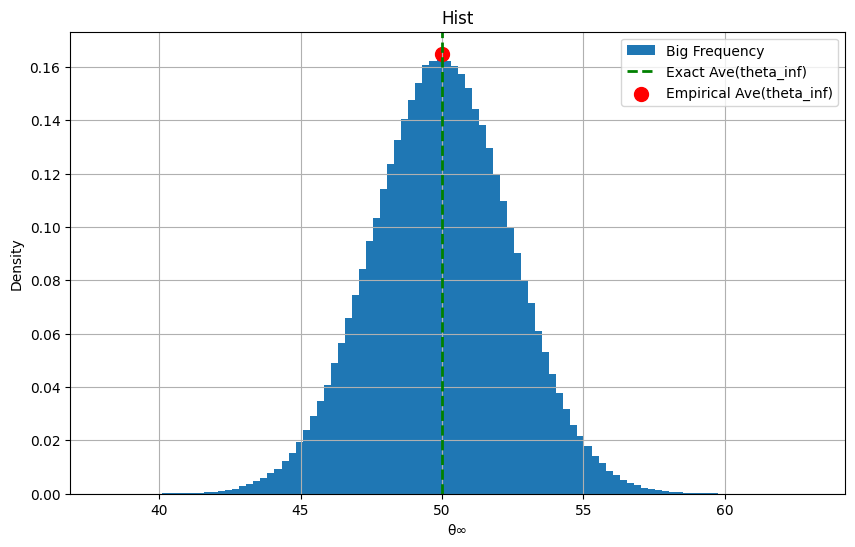

Sample Mean: 49.9995, Theoretical Mean: 50
Sample Std: 2.4485, Theoretical Std: 2.0000


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
n = 50                      # 节点数
delta = 1                   # 邻接边界
epsilon = 0.1               # 隐私参数
s = 1                       # S矩阵对角线元素
q = 0.0                     # 噪声衰减率（实际设为0）
num_runs = 10**6            # 运行次数
c = delta / epsilon         # 参数c

true_mean = 50
theta0 = np.random.normal(loc=true_mean, scale=10, size=(num_runs, n))
true_ave = theta0.mean(axis=1)

noise = np.random.laplace(loc=0, scale=c, size=(num_runs, n))
theta_inf = true_ave + noise.sum(axis=1) / n
empricial_theta_inf = theta_inf.mean()

# 绘制直方图
plt.figure(figsize=(10,6))
plt.hist(theta_inf, bins=100, density=True, alpha=1, label='Big Frequency')
plt.axvline(true_mean, color='green', linestyle='dashed', linewidth=2, label='Exact Ave(theta_inf)')
# 绘制均值点
plt.scatter(empricial_theta_inf, 0.165, color='red', marker='o', s=100, label='Empirical Ave(theta_inf)')
plt.xlabel('θ∞')
plt.ylabel('Density')
plt.title('Hist')
plt.legend()
plt.grid(True)
plt.show()

# 计算均值和标准差
print(f"Sample Mean: {theta_inf.mean():.4f}, Theoretical Mean: {true_mean}")
print(f"Sample Std: {theta_inf.std():.4f}, Theoretical Std: {np.sqrt(200/n):.4f}")